In [1]:
import os
import sys
current_path = os.getcwd()
parent_directory = os.path.dirname(current_path)
sys.path.append(parent_directory)  # Adds the parent directory to the Python path
from Class.jenie import Jenie
import scanpy as sc
import anndata
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
zebra = sc.read("/Volumes/kresna-ssd/data/zebrafish/23-08-29__scdata_75p_annotated__3d.h5ad")

In [4]:
zebra

AnnData object with n_obs × n_vars = 19160 × 495
    obs: 'global_z', 'global_x', 'global_y', 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'leiden', 'clusters'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'mean', 'std'
    uns: 'leiden', 'leiden_colors', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_raw', 'X_umap', 'global_sphere', 'spatial'
    varm: 'PCs'
    layers: 'spliced', 'unspliced'
    obsp: 'connectivities', 'distances'

In [5]:
zebra.obs

,global_z,global_x,global_y,n_genes,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,leiden,clusters
1.0,21.871514,551.112013,2111.847590,264,264,5.579730,1578.682570,7.364979,13,YSL
6.0,29.113061,743.650657,2167.148149,301,301,5.710427,4118.410475,8.323465,5,tailbud
8.0,20.906912,846.983513,1921.623495,318,318,5.765191,3399.142796,8.131573,5,tailbud
9.0,35.913487,818.748469,1860.573847,302,302,5.713733,4826.168534,8.482015,5,tailbud
16.0,25.685049,762.658403,1783.910982,320,320,5.771441,3498.690560,8.160430,5,tailbud
...,...,...,...,...,...,...,...,...,...,...
41350.0,202.509350,-12628.262602,6395.615447,138,138,4.934474,3391.126626,8.129212,7,ectoderm ventral anterior
41352.0,202.994596,-13229.982563,6449.245273,220,220,5.398163,2151.961720,7.674600,3,animal EVL
41353.0,206.141553,-12605.475012,7889.613143,213,213,5.365976,1915.905179,7.558467,3,animal EVL
41355.0,204.021135,-12614.333056,7631.229367,155,155,5.049856,3459.160070,8.149070,3,animal EVL


In [6]:
zebra.obs.clusters.unique().to_list()

['YSL',
 'tailbud',
 'ectoderm ventral margin',
 'marginal EVL',
 'endoderm',
 'heart mesoderm',
 'ectoderm ventral posterior',
 'animal EVL',
 'ectoderm dorsal margin',
 'somitic mesoderm',
 'ectoderm lateral posterior',
 'head mesoderm',
 'ectoderm lateral anterior',
 'ectoderm dorsal anterior',
 'ectoderm ventral anterior',
 'PGC',
 'ectoderm dorsal posteror',
 'notochord',
 'DFC',
 'pcp']

In [28]:
zebrafish_color =  {
    "YSL": "#2e9ef5",
    "tailbud": "#9deaed",
    "ectoderm ventral margin": "#96e78c",
    "marginal EVL": "#abffb9",
    "endoderm": "#fbff00",
    "heart mesoderm": "#ff6600",
    "ectoderm ventral posterior": "#bb00ff",
    "animal EVL": "#ff00d9",
    "ectoderm dorsal margin": "#ffbd38",
    "somitic mesoderm": "#d61e24",
    "ectoderm lateral posterior": "#2fff00",
    "head mesoderm": "#e2eda3",
    "ectoderm lateral anterior": "#e88cff",
    "ectoderm dorsal anterior": "#2cab79",
    "ectoderm ventral anterior": "#632bf9",
    "PGC": "#fade5c",
    "ectoderm dorsal posteror": "#5160f2",
    "notochord": "#ff57b9",
    "DFC": "#f74d8f",
    "pcp": "#badff5"
}

In [49]:
zebra.uns["clusters_colors"] = zebrafish_color

In [30]:
plt.style.use("dark_background")

In [52]:
zebra.uns["clusters_colors"]

['#f74d8fff',
 '#fade5cff',
 '#2e9ef5ff',
 '#ff00d9ff',
 '#2cab79ff',
 '#ffbd38ff',
 '#5160f2ff',
 '#e88cffff',
 '#2fff00ff',
 '#632bf9ff',
 '#96e78cff',
 '#bb00ffff',
 '#fbff00ff',
 '#e2eda3ff',
 '#ff6600ff',
 '#abffb9ff',
 '#ff57b9ff',
 '#badff5ff',
 '#d61e24ff',
 '#9deaedff']

/Users/kjenie/DataspellProjects/ptb_timepoints/.conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


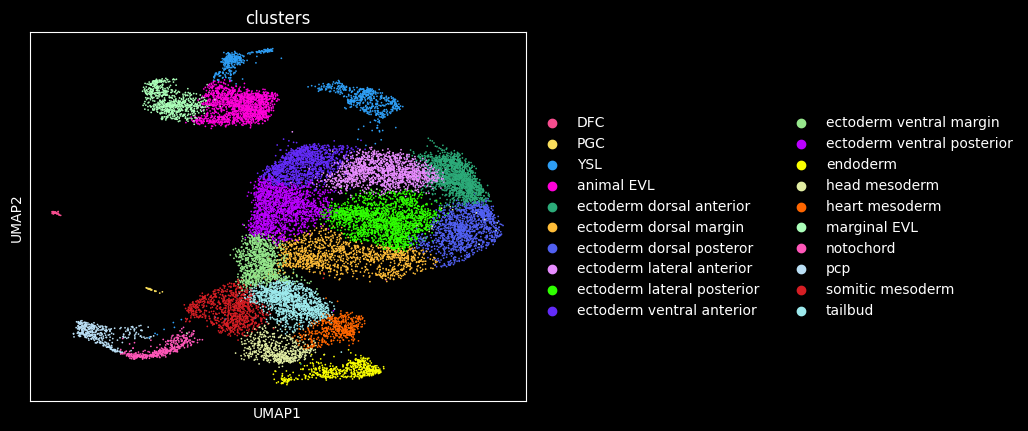

In [53]:
sc.pl.umap(zebra, color="clusters", palette=zebra.uns["clusters_colors"], legend_loc="right margin")

/Users/kjenie/DataspellProjects/ptb_timepoints/.conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


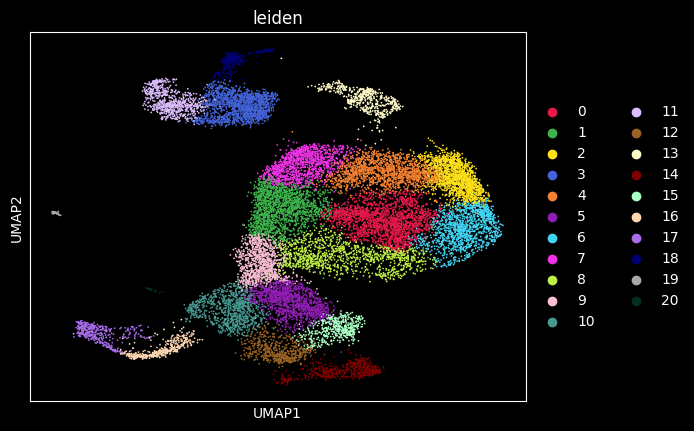

In [55]:
sc.pl.umap(zebra, color="leiden", legend_loc="right margin")

In [32]:
adata = zebra
# convert adata to df (normalized values)
df = adata.to_df()
# add the obs in the df
df = pd.concat([df, adata.obs], axis=1)

# add the brain projection coordinates in the df
for x in range(adata.obsm["spatial"].shape[1]):
    df[f"spatial{x}"] = adata.obsm["spatial"][:,x]

# add the umap coordinates in the df
# iterate through all axis if there's more than 2, it accounts for it
for x in range(adata.obsm["X_umap"].shape[1]):
    df[f"X_umap{x}"] = adata.obsm["X_umap"][:,x]

# save to redis norm + obs + umap + spatial
# for col in tqdm(df):
#     print(col)
#     print()
#     # re.save_to_redis(col, str(df[col].to_list()))
#     re.save_to_redis(col, json.dumps(df[col].to_list()))
    # break

# convert adata to df (raw values)
# df = pd.DataFrame(adata.obsm["X_raw"], columns=adata.to_df().columns, index=adata.obs.index)

# # save to redis raw
# for col in tqdm(df):
#     re.save_to_redis(f"{col}_raw", json.dumps(df[col].to_list()))
#     # break


# # also save the uns for coloring purposes
# re.save_to_redis("uns", str(adata.uns))

In [33]:
df

,ackr3b,acvr1ba,add3b,adka,ahi1,alcamb,aplnra,aplnrb,hesx1,arl6ip5a,...,log1p_n_genes_by_counts,total_counts,log1p_total_counts,leiden,clusters,spatial0,spatial1,spatial2,X_umap0,X_umap1
1.0,-1.119090,0.211669,-2.159180,-0.259333,0.012357,-1.788214,0.141927,-0.745684,-0.755248,1.244872,...,5.579730,1578.682570,7.364979,13,YSL,774.489711,-5526.645964,21.871514,11.518022,12.485832
6.0,-0.355504,-0.040972,0.309565,0.300576,0.446953,-1.788214,0.931840,0.762154,-0.362273,0.931632,...,5.710427,4118.410475,8.323465,5,tailbud,958.853759,-5448.293049,29.113061,9.177249,-2.932487
8.0,-1.119090,-1.502609,-0.317672,-0.201578,-1.094202,-1.265863,-0.056197,-0.745684,-0.387021,2.431019,...,5.765191,3399.142796,8.131573,5,tailbud,1091.338316,-5679.394492,20.906912,8.910547,-2.293611
9.0,-0.245625,-0.457448,0.567653,-0.127204,-0.064750,-0.835300,0.680052,0.979129,-0.169605,-0.565368,...,5.713733,4826.168534,8.482015,5,tailbud,1070.753812,-5743.430072,35.913487,8.640681,-1.820836
16.0,-1.119090,0.440582,-0.000708,0.117013,-1.027033,-0.200721,0.414376,-0.745684,0.512192,1.027795,...,5.771441,3498.690560,8.160430,5,tailbud,1024.424686,-5826.357163,25.685049,8.650243,-2.369887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41350.0,-1.119090,-1.502609,0.214139,-3.161811,-1.894626,2.083981,0.269331,-0.745684,-1.972244,-0.565368,...,4.934474,3391.126626,8.129212,7,ectoderm ventral anterior,-12828.707819,5583.463915,202.509350,9.686779,5.792047
41352.0,1.543313,0.119437,-1.393431,-3.161811,-1.894626,2.058589,1.119178,-0.745684,-1.972244,-0.565368,...,5.398163,2151.961720,7.674600,3,animal EVL,-13432.478483,5563.362776,202.994596,7.843827,12.175717
41353.0,1.565240,-1.502609,-0.541899,-0.895875,-1.894626,1.863312,1.212189,-0.745684,-0.392510,-0.565368,...,5.365976,1915.905179,7.558467,3,animal EVL,-12988.162602,7069.102687,206.141553,7.594912,11.827206
41355.0,-1.119090,-1.502609,-0.661285,-3.161811,-1.894626,1.748041,0.954828,-0.745684,0.721145,-0.565368,...,5.049856,3459.160070,8.149070,3,animal EVL,-12965.465559,6811.565341,204.021135,7.007294,11.491766


In [35]:
# Define the new min and max values
new_min = -10
new_max = 10

# Calculate the current min and max values of the X_umap0 column
min_value = df['X_umap0'].min()
max_value = df['X_umap0'].max()

# Normalize the X_umap0 column to be between -10 and 10
df['X_umap0_norm'] = ((df['X_umap0'] - min_value) / (max_value - min_value)) * (new_max - new_min) + new_min

# Define the new min and max values
new_min = -10
new_max = 10

# Calculate the current min and max values of the X_umap1 column
min_value = df['X_umap1'].min()
max_value = df['X_umap1'].max()

# Normalize the X_umap1 column to be between -10 and 10
df['X_umap1_norm'] = ((df['X_umap1'] - min_value) / (max_value - min_value)) * (new_max - new_min) + new_min

In [36]:
df

,ackr3b,acvr1ba,add3b,adka,ahi1,alcamb,aplnra,aplnrb,hesx1,arl6ip5a,...,log1p_total_counts,leiden,clusters,spatial0,spatial1,spatial2,X_umap0,X_umap1,X_umap0_norm,X_umap1_norm
1.0,-1.119090,0.211669,-2.159180,-0.259333,0.012357,-1.788214,0.141927,-0.745684,-0.755248,1.244872,...,7.364979,13,YSL,774.489711,-5526.645964,21.871514,11.518022,12.485832,3.646211,7.569469
6.0,-0.355504,-0.040972,0.309565,0.300576,0.446953,-1.788214,0.931840,0.762154,-0.362273,0.931632,...,8.323465,5,tailbud,958.853759,-5448.293049,29.113061,9.177249,-2.932487,0.700411,-5.056213
8.0,-1.119090,-1.502609,-0.317672,-0.201578,-1.094202,-1.265863,-0.056197,-0.745684,-0.387021,2.431019,...,8.131573,5,tailbud,1091.338316,-5679.394492,20.906912,8.910547,-2.293611,0.364773,-4.533052
9.0,-0.245625,-0.457448,0.567653,-0.127204,-0.064750,-0.835300,0.680052,0.979129,-0.169605,-0.565368,...,8.482015,5,tailbud,1070.753812,-5743.430072,35.913487,8.640681,-1.820836,0.025154,-4.145909
16.0,-1.119090,0.440582,-0.000708,0.117013,-1.027033,-0.200721,0.414376,-0.745684,0.512192,1.027795,...,8.160430,5,tailbud,1024.424686,-5826.357163,25.685049,8.650243,-2.369887,0.037188,-4.595513
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41350.0,-1.119090,-1.502609,0.214139,-3.161811,-1.894626,2.083981,0.269331,-0.745684,-1.972244,-0.565368,...,8.129212,7,ectoderm ventral anterior,-12828.707819,5583.463915,202.509350,9.686779,5.792047,1.341640,2.088094
41352.0,1.543313,0.119437,-1.393431,-3.161811,-1.894626,2.058589,1.119178,-0.745684,-1.972244,-0.565368,...,7.674600,3,animal EVL,-13432.478483,5563.362776,202.994596,7.843827,12.175717,-0.977666,7.315523
41353.0,1.565240,-1.502609,-0.541899,-0.895875,-1.894626,1.863312,1.212189,-0.745684,-0.392510,-0.565368,...,7.558467,3,animal EVL,-12988.162602,7069.102687,206.141553,7.594912,11.827206,-1.290919,7.030136
41355.0,-1.119090,-1.502609,-0.661285,-3.161811,-1.894626,1.748041,0.954828,-0.745684,0.721145,-0.565368,...,8.149070,3,animal EVL,-12965.465559,6811.565341,204.021135,7.007294,11.491766,-2.030421,6.755453


In [42]:
print(min(df["spatial0"]), max(df["spatial0"]), max(df["spatial0"])-min(df["spatial0"]))
print(min(df["spatial1"]), max(df["spatial1"]), max(df["spatial1"])-min(df["spatial1"]))
print(min(df["spatial2"]), max(df["spatial2"]), max(df["spatial2"])-min(df["spatial2"]))

-14268.441955264207 1273.8395802618552 15542.28153552606
-7935.340609956711 8599.752801683988 16535.0934116407
-6.259783513738551 218.6075 224.86728351373853


In [43]:
# Define the new min and max values
new_min = -10
new_max = 10

# Calculate the current min and max values of the spatial1 column
min_value = df['spatial1'].min()
max_value = df['spatial1'].max()

# Normalize the spatial1 column to be between -10 and 10
df['spatial1_norm'] = ((df['spatial1'] - min_value) / (max_value - min_value)) * (new_max - new_min) + new_min
df['spatial0_norm'] = ((df['spatial0'] - min_value) / (max_value - min_value)) * (new_max - new_min) + new_min
df['spatial2_norm'] = ((df['spatial2'] - min_value) / (max_value - min_value)) * (new_max - new_min) + new_min

In [47]:
df["clusters"].map(zebra.uns["clusters_colors"])

TypeError: 'list' object is not callable

In [48]:
zebra.uns["clusters_colors"]

['#f74d8f',
 '#fade5c',
 '#2e9ef5',
 '#ff00d9',
 '#2cab79',
 '#ffbd38',
 '#5160f2',
 '#e88cff',
 '#2fff00',
 '#632bf9',
 '#96e78c',
 '#bb00ff',
 '#fbff00',
 '#e2eda3',
 '#ff6600',
 '#abffb9',
 '#ff57b9',
 '#badff5',
 '#d61e24',
 '#9deaed']

In [54]:
df["clusters_colors"] = df["clusters"].map(zebrafish_color)

In [56]:
df["leiden_colors"] = df["leiden"].apply(lambda x: zebra.uns["leiden_colors"][int(x)])

In [57]:
df

,ackr3b,acvr1ba,add3b,adka,ahi1,alcamb,aplnra,aplnrb,hesx1,arl6ip5a,...,spatial2,X_umap0,X_umap1,X_umap0_norm,X_umap1_norm,spatial1_norm,spatial0_norm,spatial2_norm,clusters_colors,leiden_colors
1.0,-1.119090,0.211669,-2.159180,-0.259333,0.012357,-1.788214,0.141927,-0.745684,-0.755248,1.244872,...,21.871514,11.518022,12.485832,3.646211,7.569469,-7.086567,0.534964,-0.375365,#2e9ef5,#fffac8
6.0,-0.355504,-0.040972,0.309565,0.300576,0.446953,-1.788214,0.931840,0.762154,-0.362273,0.931632,...,29.113061,9.177249,-2.932487,0.700411,-5.056213,-6.991795,0.757961,-0.366606,#9deaed,#911eb4
8.0,-1.119090,-1.502609,-0.317672,-0.201578,-1.094202,-1.265863,-0.056197,-0.745684,-0.387021,2.431019,...,20.906912,8.910547,-2.293611,0.364773,-4.533052,-7.271323,0.918207,-0.376532,#9deaed,#911eb4
9.0,-0.245625,-0.457448,0.567653,-0.127204,-0.064750,-0.835300,0.680052,0.979129,-0.169605,-0.565368,...,35.913487,8.640681,-1.820836,0.025154,-4.145909,-7.348778,0.893309,-0.358380,#9deaed,#911eb4
16.0,-1.119090,0.440582,-0.000708,0.117013,-1.027033,-0.200721,0.414376,-0.745684,0.512192,1.027795,...,25.685049,8.650243,-2.369887,0.037188,-4.595513,-7.449082,0.837272,-0.370752,#9deaed,#911eb4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41350.0,-1.119090,-1.502609,0.214139,-3.161811,-1.894626,2.083981,0.269331,-0.745684,-1.972244,-0.565368,...,202.509350,9.686779,5.792047,1.341640,2.088094,6.351652,-15.918766,-0.156875,#632bf9,#f032e6
41352.0,1.543313,0.119437,-1.393431,-3.161811,-1.894626,2.058589,1.119178,-0.745684,-1.972244,-0.565368,...,202.994596,7.843827,12.175717,-0.977666,7.315523,6.327339,-16.649056,-0.156288,#ff00d9,#4363d8
41353.0,1.565240,-1.502609,-0.541899,-0.895875,-1.894626,1.863312,1.212189,-0.745684,-0.392510,-0.565368,...,206.141553,7.594912,11.827206,-1.290919,7.030136,8.148604,-16.111634,-0.152481,#ff00d9,#4363d8
41355.0,-1.119090,-1.502609,-0.661285,-3.161811,-1.894626,1.748041,0.954828,-0.745684,0.721145,-0.565368,...,204.021135,7.007294,11.491766,-2.030421,6.755453,7.837100,-16.084181,-0.155046,#ff00d9,#4363d8


In [63]:
import redis_test as re
import json
import tqdm

In [64]:
# !pip install redis

In [72]:
for x in tqdm(df.columns):
    print(x)

TypeError: 'module' object is not callable

In [73]:
for col in (df.columns):
    print(col)
    print()
    # re.save_to_redis(col, str(df[col].to_list()))
    re.save_to_redis(col, json.dumps(df[col].to_list()))
    # break

ackr3b

acvr1ba

add3b

adka

ahi1

alcamb

aplnra

aplnrb

hesx1

arl6ip5a

aspm

atf6

axin2

bambia

bhlha15

bmp2b

bmp7a

btg2

tbx3b

c1qbp

zmp:0000000624

ca9

casz1

cbx3a

cbx5

ccne2

ccng1

cd63

cdc14b

cdc42ep4a

cdca8

cdh1

cenpf

cfl1l

chst11

cldnd

clic4

clocka

cnn3a

crabp2b

creb3l2

cst3

cth1

cxcr4a

dact2

dharma

dkc1

dlgap5

dlx3b

dynll2b

efemp2b

efnb2b

egln1b

elavl3

emid1

emx3

epha2a

ephb3a

esrra

etv4

etv5a

eve1

f11r.1

lratd1

fbln2

zgc:175088

fgf8a

flrt3

fn1a

fn1b

fnbp1l

foxa2

foxa3

foxc1b

foxd3

foxn2b

foxp1b

fscn1a

fzd7b

fzd8a

gadd45gip1

gata2a

gbx1

gfi1aa

gli2a

gmnn

grhl1

grhl2b

gsc

h1-0

helb

hells

her12

her2

her5

her8a

her9

hic1l

higd1a

hivep2a

hoxb7a

hoxb8a

hoxc3a

hoxc6a

igf2bp1

igfbp1a

irx3a

irx5a

ism1

itgb5

itm2cb

kank1a

kazald2

kdrl

klf7a

lamc1

lamp2

lbx2

cnmd

lgals3b

lhx5

lima1a

lmo2

lmo4a

lratb.1

mab21l2

mad1l1

map1lc3b

map2k6

mcama

mcm2

mcm3

mcm4

mef2d

meis1b


In [75]:
adata = zebra
df = pd.DataFrame(adata.obsm["X_raw"], columns=adata.to_df().columns, index=adata.obs.index)

# save to redis raw
for col in (df):
    re.save_to_redis(f"{col}_raw", json.dumps(df[col].to_list()))
    # break

In [76]:
zebra.obsm["X_raw"]

array([[  0.        ,   0.97993952,   1.46990928, ...,   5.87963713,
         19.10882068,  24.49848805],
       [  0.9791751 ,   1.9583502 ,  53.85463055, ..., 123.37606272,
        193.87666999,  24.47937752],
       [  0.        ,   0.        ,  23.64895266, ...,  78.04154378,
        121.39795699,  29.16704162],
       ...,
       [  4.41860051,   0.        ,  10.60464121, ...,   0.        ,
         20.32556233,  13.25580152],
       [  0.        ,   0.        ,  16.93591222, ...,   0.        ,
         76.21160497,  33.87182443],
       [  4.54408261,   0.        ,   4.54408261, ...,   0.        ,
         12.11755361,  13.63224782]])